# Performance Test 000

In [82]:
%run ../heaps/heaps.ipynb import MaxHeap
%run ../doubly-linked-lists/doubly-linked-lists.ipynb import DoublyLinkedList
%run ./has-performance.ipynb import HasPerformance

.                                                                                            [100%]
1 passed in 0.01s
======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-8.3.5, pluggy-1.5.0 -- /home/xsazcd/git/obar1/py-tiny-datastructures.git/.venv/bin/python
cachedir: .pytest_cache
rootdir: /home/xsazcd/git/obar1/py-tiny-datastructures.git/has-performance
plugins: nbval-0.11.0, cov-6.0.0, anyio-4.8.0
collecting ... collected 1 item

t_393449265a1d442abe9583bde933d77e.py::test PASSED                                           [100%]

======================================== 1 passed in 0.01s =========================================
======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-8.3.5, pluggy-1.5.0 -- /home/xsazcd/git/obar1/py-tiny-datastructures.git/.venv/bin/python
cachedir: .pytest_cache
rootdir: /home

In [83]:
n_iterations = 30000

In [84]:
def get_hp() -> HasPerformance:
    return HasPerformance()


def get_mh() -> MaxHeap:
    return MaxHeap()


def get_dll() -> DoublyLinkedList:
    return DoublyLinkedList(None)

In [85]:
res_hp = get_hp()


def test_get_dll():
    for i in range(n_iterations):
        get_dll().append(i)
        res_hp.save(f"{get_dll().id}; has added {i}")


def test_get_mh():
    for i in range(n_iterations):
        get_mh().insert(i)
        res_hp.save(f"{get_mh().id}; has added  {i}")


test_get_dll()
test_get_mh()

In [86]:
import pandas as pd

df = res_hp.con.sql(
    """
SELECT 
    split_part(s, ';', 1) as name,
    min(created_at) min_time,
                           max(created_at) max_time,
  
                         COUNT(id) as count
FROM tbl
GROUP BY 1
                         """
).df()
df.dtypes

name                object
min_time    datetime64[us]
max_time    datetime64[us]
count                int64
dtype: object

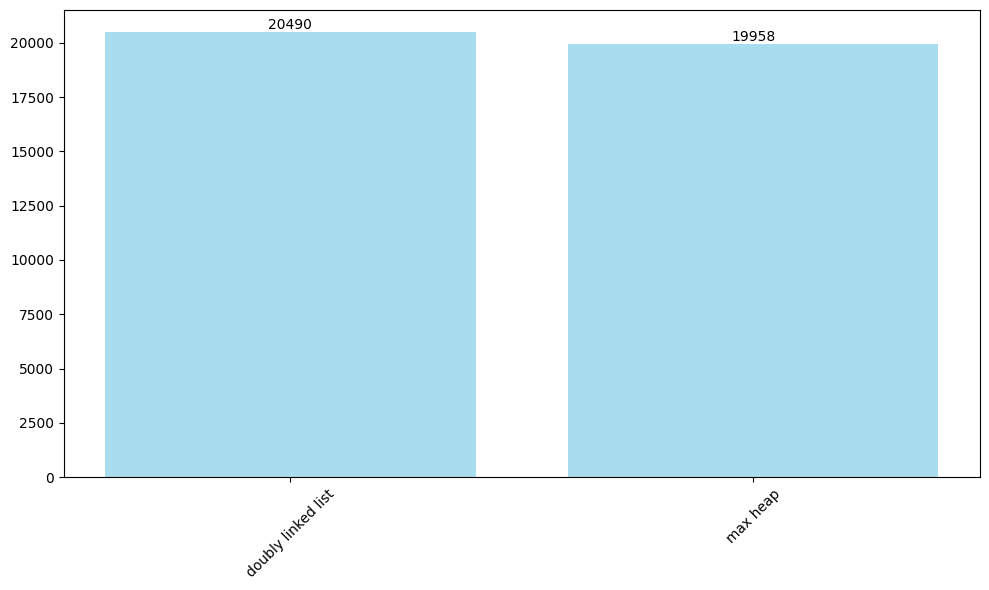

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['durations'] = (df['max_time'] - df['min_time']).dt.total_seconds() * 1000

plt.figure(figsize=(10, 6))

bars = plt.bar(df['name'], df['durations'],
               capsize=5, alpha=0.7, color='skyblue')


plt.xticks(rotation=45)

plt.tight_layout()
plt.bar_label(bars)

plt.show()
 
